# Keras API Project

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way, in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

## Set up

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

#### Create a feature lookup function

In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

We start to see some features with NAs (counts below the row number of 396030)

## Exploratory Data Analysis

First, let's check how balance the response is.

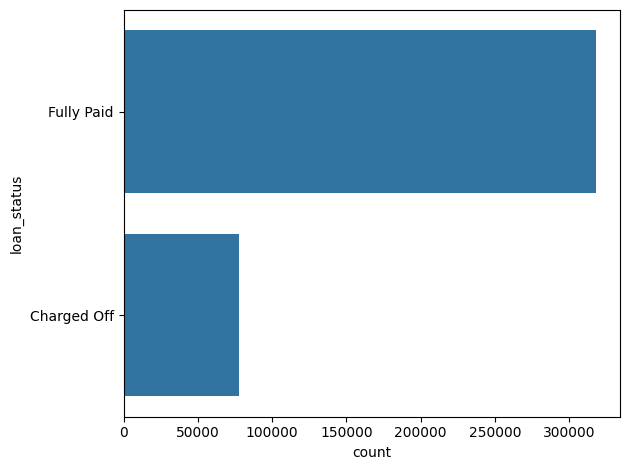

In [9]:
sns.countplot(df['loan_status'])
plt.tight_layout()

We can already see a dataset a bit imbalanced. Most responses are ones (fully paid), and a minority correspond to charged off. I assume that we are very intersted in predicting charged off probability accurate, as this will give us a tool to decide whether to give a loan to someone.

we also might be interested in understand how much the users are borrowing, and the distribution of the loans magnitude.

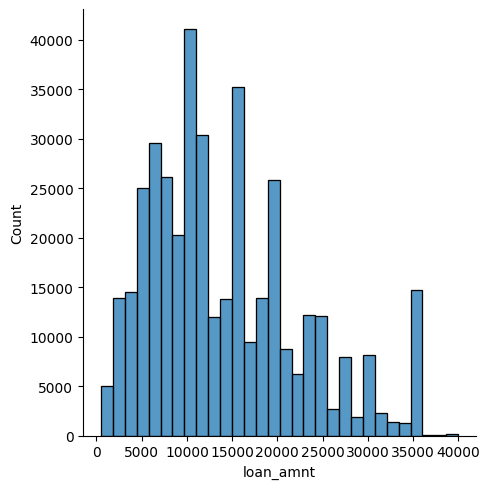

In [10]:
sns.displot(df['loan_amnt'], bins = 30)
plt.tight_layout()

The distribution suggests a high density of loans ranging between 5000-12000. However, there are significant peaks at higher amounts to consider. These peaks probably reflect standard loan options.

A good perspective on the data is to explore the relationships within the data in its current form. First, I will focus on the corretation between the features and the label, and then on the correlation among the features themselves.

In [11]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

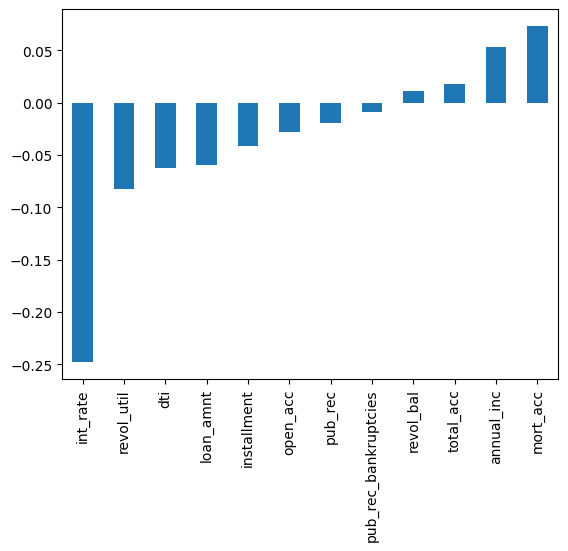

In [12]:
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().plot(kind = 'bar')

With the available numerical variables, we see an overall modest correlation, with `int_rate` having the strongest association. This correlation is negative, which indicates that a higher interest rate is associated with more Charged Off.

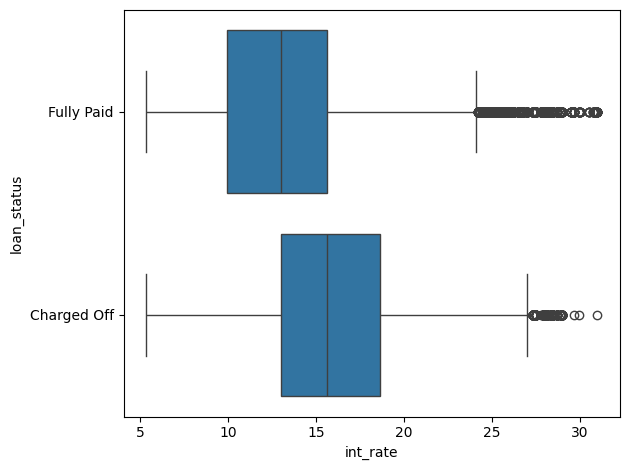

In [13]:
sns.boxplot(x='int_rate', y = 'loan_status', data = df)
plt.tight_layout()

It is also worth exploring the loan amount, as it is one of the more intuitive possible relationships in the data.

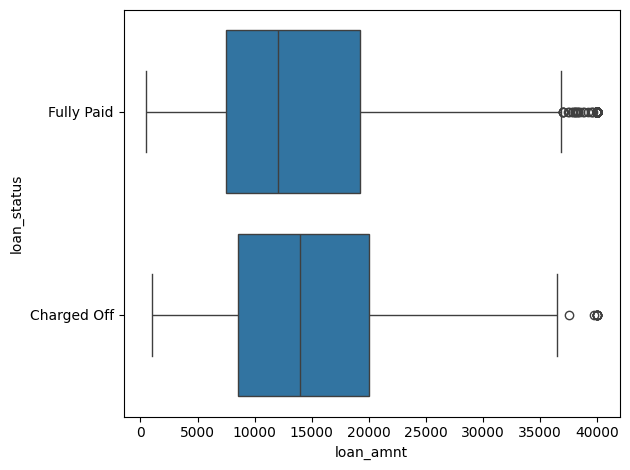

In [14]:
sns.boxplot(x='loan_amnt', y = 'loan_status', data = df)
plt.tight_layout()

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The combination of the correlation, boxplot and descriptive stats confirms that the loan amount and interest rate have some effects on whether the loan was paid off. Both features are negatively correlated, meaning that as the loan amount and interest grow, it is less likely that the person is able to pay the loan. Something also interesting to draw from the descriptive stats is that the minimum amount between the label halves, while the maximum remains stable. Thus, when the loans are pretty low, they are intuitively more likely to be paid off.

<Axes: >

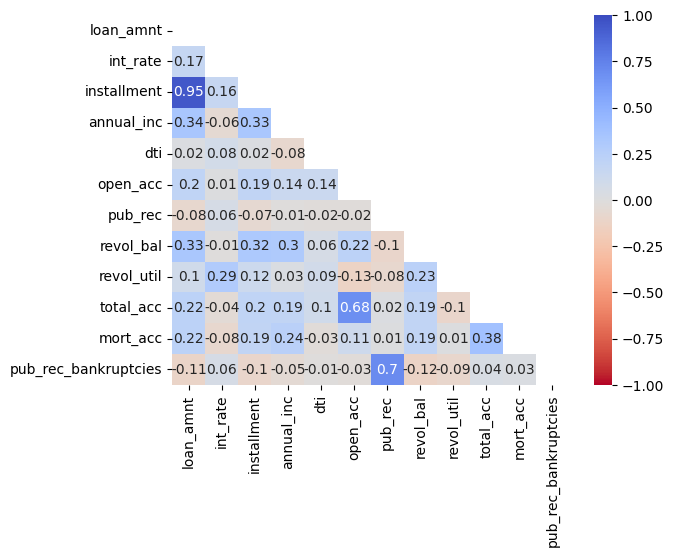

In [16]:
corrs = df.drop('loan_repaid', axis = 1).corr(numeric_only=True)
mask = np.triu(np.ones_like(corrs, dtype = bool))
sns.heatmap(corrs.round(2),
            mask = mask,
            cmap = 'coolwarm_r',
            annot=True,
            vmin = -1,
            vmax = 1)

Something that stands out very quickly is the very high positive correlation between `installment` and `loan_amnt`. This makes sense because the larger the loan, the higher the monthly payment. `installment` seems to be dericed from `loan_amnt`. Thus, this might be duplicated information that could be polished by just picking one.

In [17]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


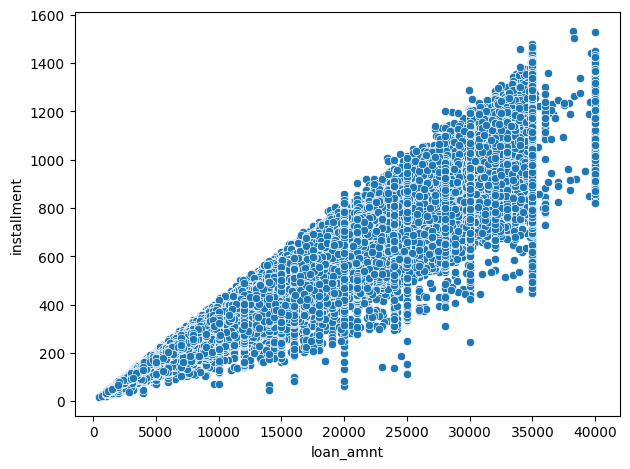

In [19]:
sns.scatterplot(x='loan_amnt',y='installment', data = df)
plt.tight_layout()

This scatterplot just adds confidence and more depth to the very high correlation between these two features, and how `installment` looks structurally derived from `loan_amnt`, as indicated by the vertical congregation of plots at fixed loan amounts.

We need start looking at the features that might need to be redefined for the model. These are categories within variables, like the Grade and Subgrade that LendingClub attribute to the loans.

In [20]:
print(df['grade'].sort_values().unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [21]:
print(df['sub_grade'].sort_values().unique())

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


We have 7 different Grades and 5 subgrades per Grade category

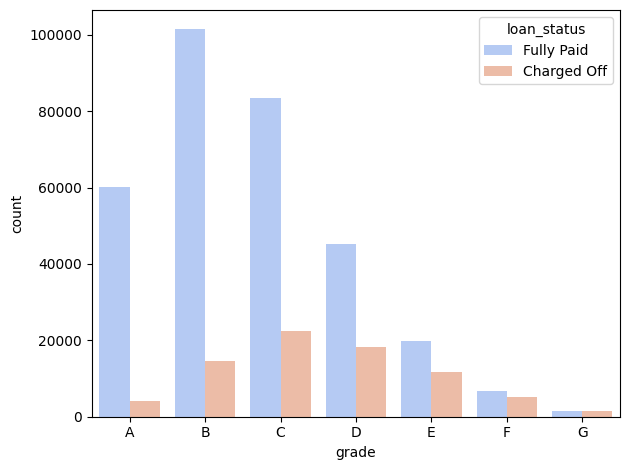

In [22]:
sns.countplot(x='grade', hue = 'loan_status', palette = 'coolwarm' ,
              data = df.sort_values(by = 'grade'))
plt.tight_layout()

Overall, higher-grade loans (A and B) are much more frequent and have a greater proportion of fully paid outcomes, reflecting lower default risk among higher-quality borrowers. As the grade declines toward D, E, F, and G, both the total number of loans and the proportion of fully paid loans decrease, while the proportion of charged-off loans increases. This pattern clearly indicates that loan grade is strongly associated with default likelihood—borrowers with poorer grades are less common but considerably more prone to default.

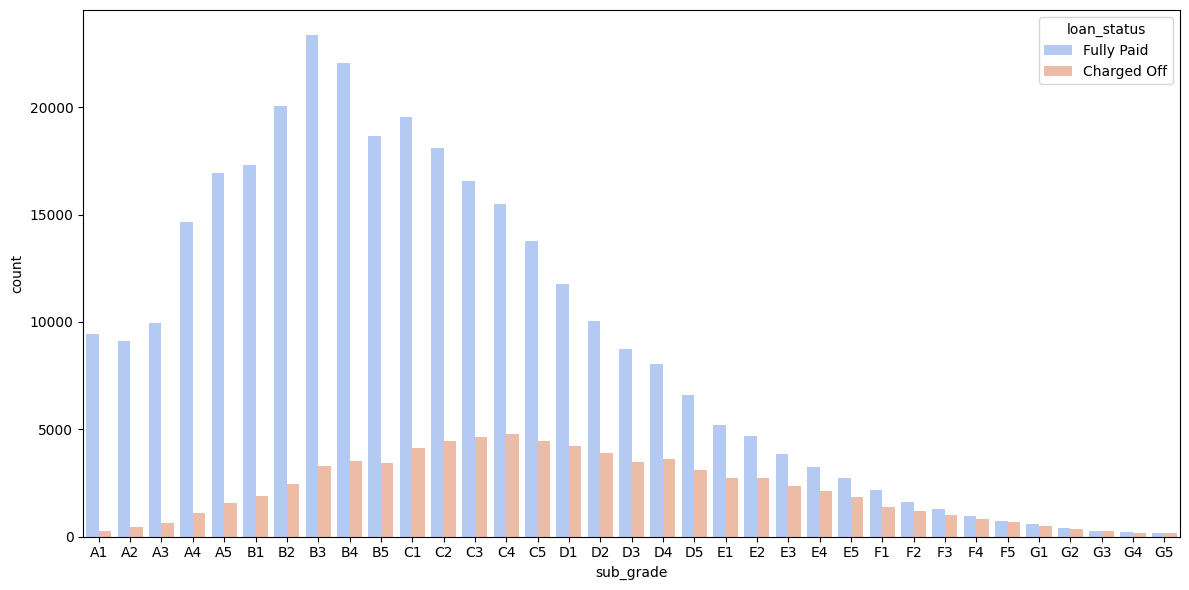

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', hue = 'loan_status', palette = 'coolwarm' ,
              data = df.sort_values(by = 'sub_grade'))

plt.tight_layout()

The general pattern observed at the grade level persists here: loans with better sub-grades (e.g., A1–B3) are far more frequent and have a much higher proportion of Fully Paid outcomes, while lower sub-grades (D–G) not only appear less often but also show a steadily rising share of Charged Off loans. The gradient from A1 to G5 visually reinforces the relationship between credit quality and repayment reliability—default risk increases progressively as sub-grade declines.

Let's zoom in the last 3 grades (E-G) to see how the pattern in `loan_status` changes across worse grades.

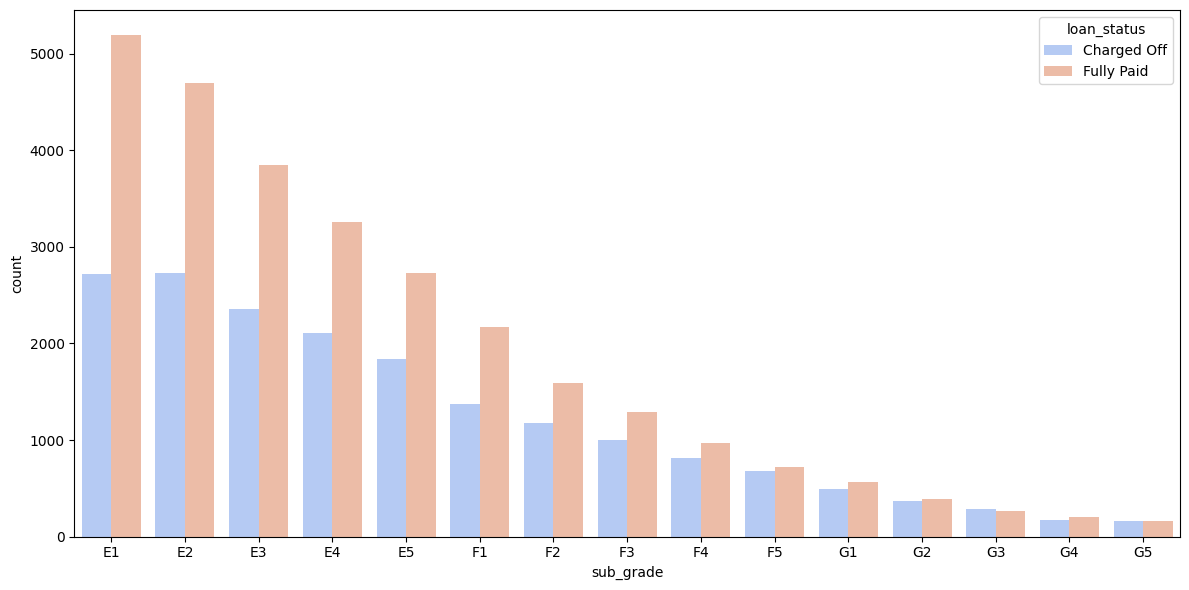

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='sub_grade',
    hue='loan_status',
    palette='coolwarm',
    data=df.loc[df['grade'].isin(['E', 'F', 'G'])].sort_values(by='sub_grade')
)
plt.tight_layout()

This zoomed plot shows a clear deterioration in loan performance within these higher-risk categories. Even within grade E, the proportion of Charged Off loans is substantial and grows as sub-grades decline (E1 → E5). Moving into grades F and G, both the total number of loans and the share of fully paid outcomes decrease sharply, while defaults become dominant. By the lowest sub-grades (G4–G5), charged-off loans are nearly as frequent as, or exceed, fully paid ones. This trend highlights how borrowers in poorer credit segments face steeply rising default risk, confirming that the sub-grade variable effectively captures gradations of creditworthiness.

## Data Pre-Processing

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


### Missing Data

Let's explore how the missing data looks like.

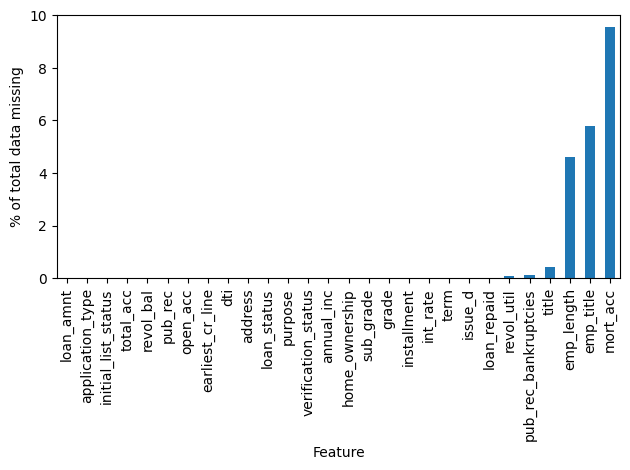

In [26]:
df.isna().apply(lambda x: (sum(x) / (len(df)))*100).sort_values().plot(kind = 'bar')
plt.ylabel('% of total data missing')
plt.xlabel('Feature')
plt.tight_layout()

This clearly shows the columns that have missing values and the percentage of the data in those columns that is missing. These are the columns we will be focusing on here.

In [27]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [28]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [29]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [30]:
feat_info('mort_acc')

Number of mortgage accounts.


In [31]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


#### `emp_title`

In [32]:
df.value_counts('emp_title')

emp_title
Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
Hy Powered                             1
Hy Vee                                 1
Hy-Vee Food Store                      1
HyPro, Inc.                            1
​License Compliance Investigator       1
Name: count, Length: 173105, dtype: int64

In [33]:
len(df['emp_title'].unique())

173106

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [34]:
df = df.drop('emp_title', axis = 1)

#### `emp_length`

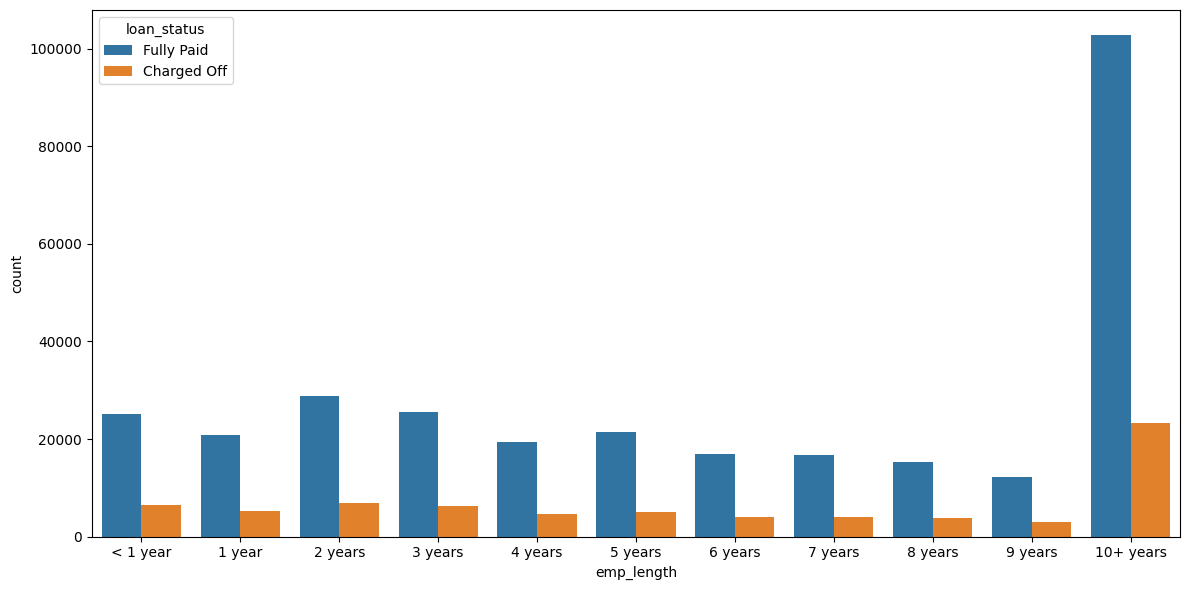

In [35]:
plt.figure(figsize=(12,6))
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', 
         '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
sns.countplot(x = 'emp_length', data = df, order = order, hue = 'loan_status')
plt.tight_layout()

The majority of borrowers have 10+ years of employment, and this group also records the highest number of fully paid loans, suggesting that longer job stability correlates with better repayment performance. For most other employment durations, the number of fully paid loans remains consistently higher than charged-off loans, with relatively small variation across categories. Overall, employment length appears weakly related to default risk—borrowers with long-term employment perform slightly better, but defaults occur across all experience levels.

To confirm this, it would be useful to have a percentage of charge offs per category, so they can be compared more effectively.

In [36]:
emp_vs_loan = df.groupby(['emp_length','loan_status'])['loan_status'].count().unstack().reset_index()
emp_vs_loan

loan_status,emp_length,Charged Off,Fully Paid
0,1 year,5154,20728
1,10+ years,23215,102826
2,2 years,6924,28903
3,3 years,6182,25483
4,4 years,4608,19344
5,5 years,5092,21403
6,6 years,3943,16898
7,7 years,4055,16764
8,8 years,3829,15339
9,9 years,3070,12244


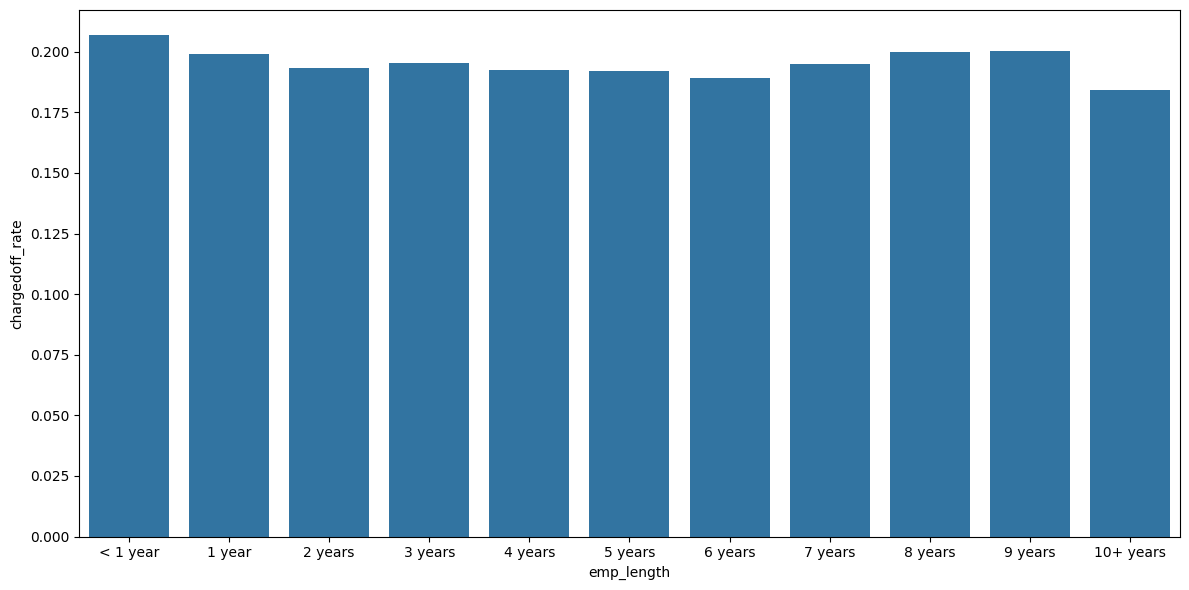

In [37]:
emp_vs_loan['chargedoff_rate'] = emp_vs_loan['Charged Off'] / (
    emp_vs_loan['Charged Off'] + emp_vs_loan['Fully Paid']
)

plt.figure(figsize=(12,6))
sns.barplot(x = 'emp_length', y = 'chargedoff_rate', data = emp_vs_loan, order = order)
plt.tight_layout()

This plot shows the charged-off rate (i.e., the proportion of loans that defaulted) across different employment lengths, providing a clearer view than the raw counts in the previous figure. Overall, the rate remains fairly stable across categories, hovering around 18–20%. Borrowers with very long employment (10+ years) show slightly lower default rates, but the variation is minimal. This suggests that while employment length affects the total number of loans issued (as we saw in the previous plot), it has little predictive power for default risk—loan performance is broadly consistent regardless of years employed.

With this information, we can decide that it is not worth keeping these categories as it would add significant noise to the model without clear indication of facilitating classification.

In [38]:
df = df.drop('emp_length', axis = 1)

Let's review how the missing data is still spread in our dataset.

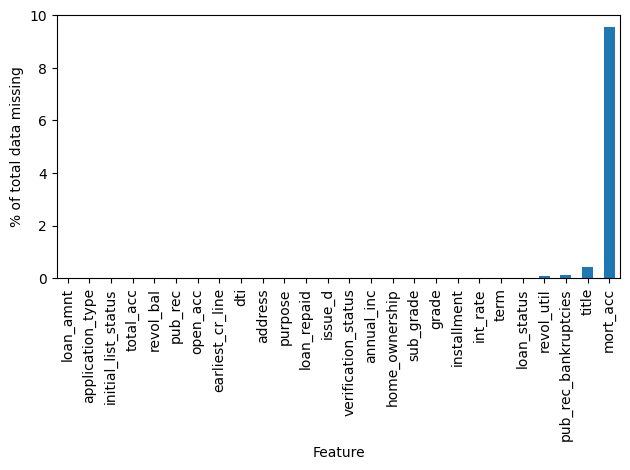

In [39]:
df.isna().apply(lambda x: (sum(x) / (len(df)))*100).sort_values().plot(kind = 'bar')
plt.ylabel('% of total data missing')
plt.xlabel('Feature')
plt.tight_layout()

#### `title`

In the description, `title` and `purpose` seems to have very close definitions. So, let's explore if they are providing redundant information.

In [40]:
feat_info('title')

The loan title provided by the borrower


In [41]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [42]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

The title column is simply a string subcategory/description of the purpose column. Thus, we will drop the `title` column, as it is the one with missing information.

In [44]:
df = df.drop('title', axis = 1)

#### `mort_acc`

This is the variable with the largest amount of missing information (near 10% of the data). So let's explore what should we do with this variable.

In [45]:
feat_info('mort_acc')

Number of mortgage accounts.


In [46]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

Let's explore the relationship between `mort_acc` and other columns to see if there is any information that we can retrieve (perhaps from highly correlated features).

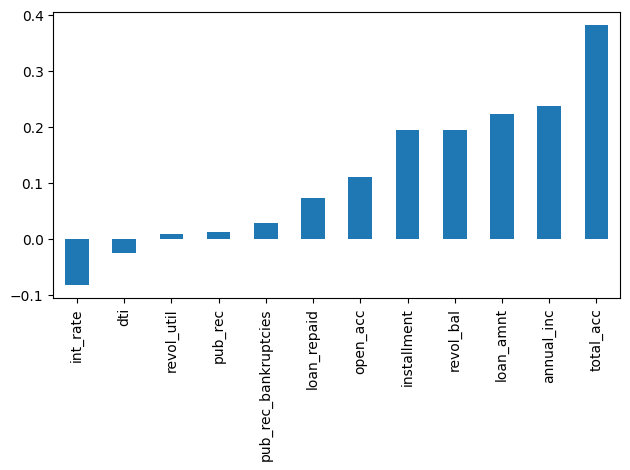

In [47]:
df.corr(numeric_only=True)['mort_acc'].sort_values()[:-1].plot(kind = 'bar')
plt.tight_layout()

The most correlated variable is `total_acc`. This makes a lot of sense.

In [48]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


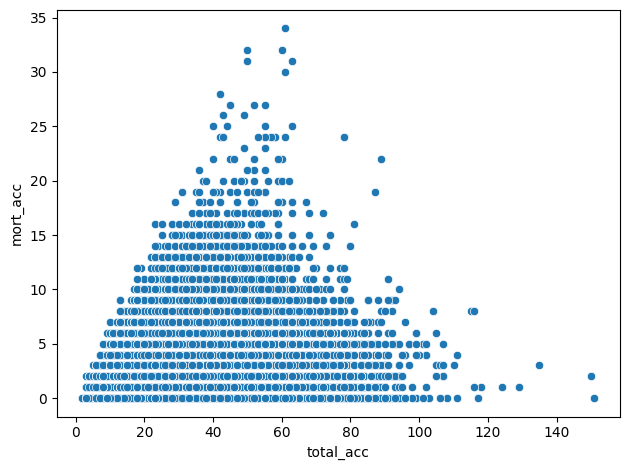

In [49]:
sns.scatterplot(x = 'total_acc', y = 'mort_acc', data = df)
plt.tight_layout()

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

First, I will take the mean `mort_acc` across each `total_acc` value.

In [50]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [51]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [52]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [53]:
df['mort_acc'].isna().sum()

0

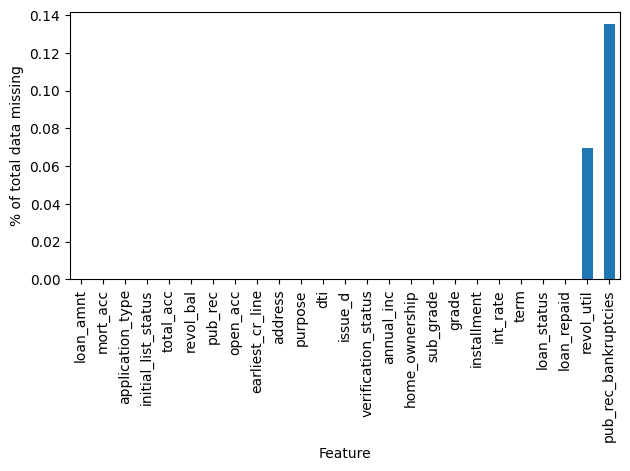

In [54]:
df.isna().apply(lambda x: (sum(x) / (len(df)))*100).sort_values().plot(kind = 'bar')
plt.ylabel('% of total data missing')
plt.xlabel('Feature')
plt.tight_layout()

#### `revol_util` and `pub_rec_bankruptcies`

These are the last columns for which we have some missing data. However, the amount of missing data is of less than 0.15%. This means that trying to input missing values for these few columns is not very cost effective, so we will just drop these rows

In [55]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical and Dummy variables

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  pub_r

In [57]:
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

#### `term`

In [58]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [59]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)

In [60]:
df['term'].unique()

array([36, 60])

In [61]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

#### `grade`

We already know grade is part of sub_grade, so just drop the grade feature.

In [62]:
df = df.drop('grade', axis = 1)

In [63]:
list(df.select_dtypes(['object']).columns)

['sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

Then, we need to convert the subgrades into dummy variables.

In [64]:
sub_grades = pd.get_dummies(df['sub_grade'], drop_first = True, dtype=float)
sub_grades

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df = df.drop('sub_grade', axis = 1)
df = pd.concat([df, sub_grades], axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [67]:
list(df.select_dtypes(['object']).columns)

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

#### `verification_status`, `application_type`, `initial_list_status`, `purpose` 

In [68]:
dummies = pd.get_dummies(df[['verification_status', 
                             'application_type',
                             'initial_list_status',
                             'purpose' ]],
                         drop_first=True,
                         dtype=float)

In [69]:
dummies.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [71]:
list(df.select_dtypes(['object']).columns)

['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line', 'address']

#### `home_ownership`

In [72]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [73]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [74]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [75]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True,
                         dtype=float)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
list(df.select_dtypes(['object']).columns)

['issue_d', 'loan_status', 'earliest_cr_line', 'address']

#### `address`

In [77]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

Let's retrieve the zipcode rather than having the full address.

In [78]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [79]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True,
                         dtype=float)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

#### `issue_d`

In [80]:
df['issue_d'].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [81]:
feat_info('issue_d')

The month which the loan was funded


This variable could be problematic because it could bias the model due to data leakage. We wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [82]:
df = df.drop('issue_d',axis=1)

#### `earliest_cr_line`

In [83]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [84]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

This appears to be a historical time stamp feature. I will use the year from this variable as a feature in the model.

In [85]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [86]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [87]:
list(df.select_dtypes(['object']).columns)

['loan_status']

#### `loan_status`

This will now be a duplicate since we created `loan_repaid`, converting the response to binary.

In [88]:
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [89]:
df = df.drop('loan_status',axis=1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc          

In [91]:
df.shape

(395219, 79)

Great! It seems that we have finished cleaning the dataset and it is ready for the model.

### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalising the Data

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

#### Model Design and Justification

Two neural network architectures were developed and compared to predict loan repayment using a dataset of 395,219 samples and 78 input features.

The initial model followed a compact, compression-style design with dense layers of 78 → 39 → 19 neurons, each using ReLU activations and 0.2 dropout. A sigmoid output layer handled the binary classification, trained with the Adam optimizer (batch size = 256, epochs = 25). This architecture aimed to mirror the feature dimensionality and gradually condense information. However, the model exhibited unstable training dynamics and large fluctuations in validation loss, suggesting optimization instability and limited learning capacity. These issues were likely due to over-aggressive compression, excessive dropout, and the absence of normalization or adaptive learning-rate control.

The revised model adopted a more expressive and regularized architecture with wider layers (256 → 128 → 64), each followed by Batch Normalization and moderate dropout (0.1–0.2). L2 kernel regularization was added to constrain weight growth, and the learning rate was reduced to 0.0005 for smoother convergence. EarlyStopping and ReduceLROnPlateau callbacks were introduced to prevent overfitting and dynamically adjust the learning rate. While this configuration produced slightly more stable gradients and marginally better overall accuracy, the improvement was small relative to the significant increase in computational cost and model complexity.

Ultimately, the simpler original model was retained as the preferred configuration, offering a more efficient and interpretable balance between performance and practicality. This decision reflects a key principle in applied machine learning: in structured tabular problems, additional depth and complexity do not necessarily translate into meaningful gains, particularly when the underlying data relationships are relatively shallow and noisy.

In [123]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

The code below is to implement Early Stopping if the model shows signs of overfitting. After running a series of models it was clear that overfitting was not the use for this specific model. So, we opted to have a final simpler model without the callback design. I am leaving the code here just in case I need to recreate the other model in the future, with its features described in the model justification above. 

In [124]:
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#callbacks = [
#    EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, mode = 'min',),
#    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
#]

In [125]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=256,
    #callbacks=callbacks,
    verbose=1
)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.3265 - val_loss: 0.2721
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.2850 - val_loss: 0.2729
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2800 - val_loss: 0.2696
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.2791 - val_loss: 0.2764
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.2815 - val_loss: 0.2677
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.2829 - val_loss: 0.2721
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2919 - val_loss: 0.2642
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2949 - val_loss: 0.2650
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.3128 - val_loss: 0.2690
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.3111 - val_loss: 0.2854
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.3048 - val_loss: 0.3542
Epoch 12/25
1236/1

Save the model

In [126]:
from tensorflow.keras.models import load_model

In [127]:
model.save('model_simpler_v3.keras')  

### Evaluating model performance

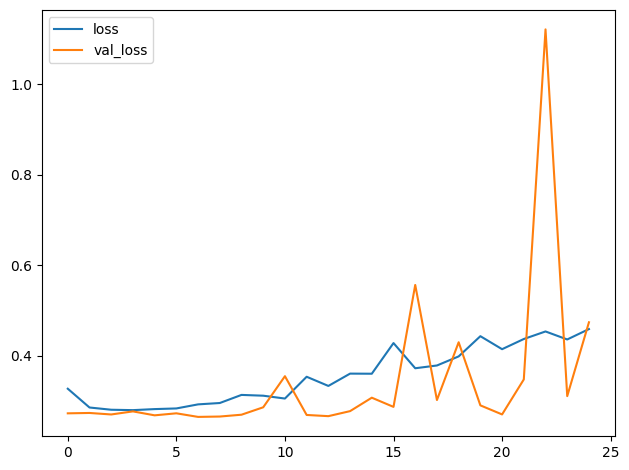

In [128]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.tight_layout()

The training and validation loss curves indicate that the model converges initially but remains somewhat unstable throughout training. Both losses decrease early on, suggesting that the network is learning meaningful structure in the data. However, the validation loss fluctuates strongly across epochs, implying sensitivity to mini-batch composition and a lack of smooth generalization. The presence of Batch Normalization and L2 regularization prevents explosive overfitting — losses stay within a moderate range — but the high variance shows that the data’s underlying signal is noisy or not easily separable by this architecture. The flat green line (learning rate) confirms that optimization was steady; the loss instability therefore reflects the data and class imbalance, not an erratic optimizer.

Overall, the model is learning but still struggles to generalize consistently, performing well on the dominant class while missing many minority-class cases. This pattern is typical for neural networks trained on imbalanced tabular data, suggesting that further architectural complexity will yield diminishing returns unless the imbalance or feature structure is directly addressed.

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step


In [131]:
print('================')
print('Model evaluation')
print('================')
print('\n')
print('Confusion matrix')
print('----------------')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,predictions))

Model evaluation


Confusion matrix
----------------
[[ 6730  8928]
 [   19 63367]]


Classification report
---------------------
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



The model achieves an overall accuracy of 0.89, reflecting strong predictive performance on the majority class (loans repaid) but continued difficulty in detecting the minority class (charged-off loans). Class-level metrics highlight this imbalance: for class 1 (repaid loans), the model attains perfect recall (1.00), meaning it correctly identifies nearly all repaid cases, though with slightly lower precision (0.88), indicating some false positives. For class 0 (charged-off loans), the pattern reverses—precision is perfect (1.00), showing the model almost never labels non-defaulters incorrectly, but recall drops to 0.43, revealing that more than half of actual defaults go undetected.

This asymmetry illustrates a classic trade-off in imbalanced financial data: the network heavily favors the dominant “repaid” class, producing few false alarms but missing many true defaults. The weighted F1-score of 0.87 confirms strong overall predictive power, while the macro F1 of 0.77 indicates that performance remains uneven across classes.

Overall, the model is conservative in identifying risk, prioritizing correct predictions of safe borrowers at the expense of detecting defaults. While this may be acceptable for general credit-risk profiling, applications requiring accurate detection of potential defaulters would benefit from class weighting, resampling, or probability-threshold tuning to rebalance the sensitivity of the model.

#### Prediction check
Given the customer below, would the model suggest offering this person a loan?

In [135]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [145]:
(model.predict(new_customer)> 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[1]], dtype=int32)

Validate it

In [134]:
df.iloc[random_ind]['loan_repaid']

1.0

## Project Summary and Reflections

This project applied deep learning techniques to the LendingClub dataset—a realistic and noisy credit-risk problem requiring extensive data preparation and feature engineering. The workflow began with rigorous cleaning and exploratory data analysis (EDA), which revealed important feature interactions and guided the construction of a usable input matrix for modelling. Considerable effort went into handling categorical variables, normalisation, and outlier control to ensure the data were consistent and suitable for neural network training.

Two neural network models were developed and evaluated. The second model incorporated additional complexity through batch normalisation, dropout, and L2 regularisation. While it achieved a slight improvement in overall accuracy and recall, this gain was marginal relative to the significant increase in model complexity and computational cost. Consequently, the simpler original model was deemed more practical and interpretable, providing nearly equivalent predictive power with far less overhead. This outcome highlights an important trade-off in deep learning: more layers and parameters do not guarantee better real-world performance, especially for structured, tabular data.

From a broader perspective, this project underscored the limitations of neural networks on financial datasets where relationships are often rule-based and discontinuous. Ensemble methods such as XGBoost or LightGBM would likely provide stronger baselines with greater interpretability and efficiency. Within the deep learning framework, future improvements could involve class rebalancing, feature embeddings, or hybrid architectures combining learned and tree-based representations. These conceptual adjustments would likely yield larger gains than further tuning of the existing architecture.

In summary, this project was a complete, realistic data science pipeline—from messy raw data to model deployment and evaluation. The final model performed adequately but not exceptionally, reflecting both the inherent challenge of credit-risk prediction and the importance of matching modelling approaches to data structure. The experience provided valuable insight into how neural networks behave on structured data and reinforced a key professional lesson: in data science, simplicity, alignment, and understanding of the data often outweigh raw model complexity.

# === End of Project! ===